In [1]:
import numpy as np

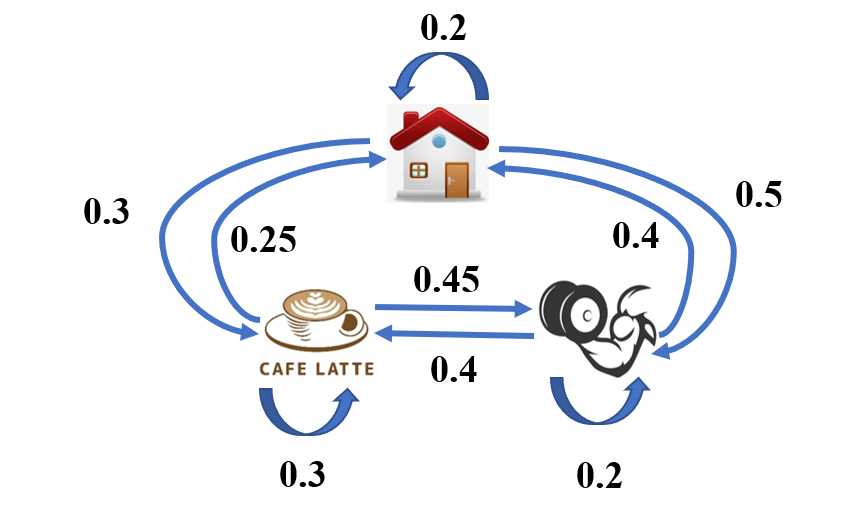

In [6]:
# Generating Adjacent Matrix
A = np.array([[0.2, 0.5, 0.3],
              [0.4, 0.2, 0.4],
              [0.25, 0.45, 0.3]])

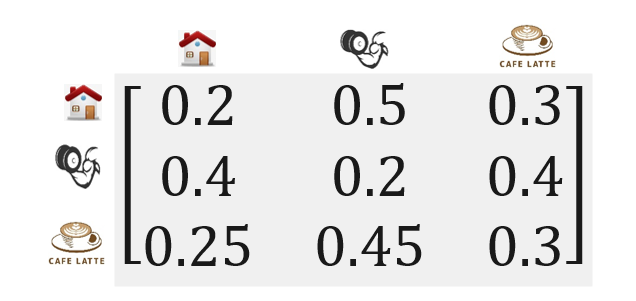

# Calculating Stationary Transition Probabilities

## Random Walk

In [13]:
# Random Walk Method
num_steps = 1000
current_state = 0  # Starting at "Home"
state_count = [0, 0, 0]  # Counting the number of times in each state

for _ in range(num_steps):
    state_count[current_state] += 1
    current_state = np.random.choice([0, 1, 2], p=A[current_state])

# Calculating the percentages of each state in the random walk
pi_random_walk = np.array(state_count) / num_steps

## Reptition Method

In [14]:
# Repetition Method with Initial Distribution [1 0 0]
# Starting at Home state
pi_repetition = np.array([1, 0, 0])
while True:
    prev_pi = pi_repetition        # old pi = new pi
    pi_repetition = prev_pi.dot(A) # new pi = old pi * A
    if np.allclose(prev_pi, pi_repetition): # if no change in pi stop iteration
        break

## Algebraic Method (Eigenvalues of A)

In [22]:
# Eigenvalues of A calculation:
_, eigenvectors = np.linalg.eig(A)
index = np.argmax(np.abs(np.real(eigenvectors)))
print(eigenvectors)

[[-0.57735027 -0.65324026  0.56933608]
 [-0.57735027 -0.15964077 -0.75050362]
 [-0.57735027  0.74012971  0.33556034]]


In [23]:
# Calculate the eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A.T)

# Normalize the eigenvectors
normalized_eigenvectors = []
for eigenvector in eigenvectors.T:
    normalized_eigenvector = eigenvector / np.linalg.norm(eigenvector)
    normalized_eigenvectors.append(normalized_eigenvector)
normalized_eigenvectors = np.array(normalized_eigenvectors).T

In [26]:
eigenvalues

array([ 1.        , -0.01771243, -0.28228757])

array([[0.2 , 0.5 , 0.3 ],
       [0.4 , 0.2 , 0.4 ],
       [0.25, 0.45, 0.3 ]])